#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Read Dataset

In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/Demo_Data_Loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


Lets just rename the target column as 'target' first

In [ ]:
df.rename(columns = {'Loan Approved':'target'}, inplace = True)

In [ ]:
df.target.value_counts()

0    341
1     26
Name: target, dtype: int64

Lets assume here,

0 means loan not approved

1 means loan approved

# EDA

Lets check if all IDs are unique or not

In [ ]:
if df.Loan_ID.value_counts().max() == df.Loan_ID.value_counts().min():
  print('All are unique')

All are unique


In [ ]:
df.shape

(367, 13)

The dataset has 367 rows and 13 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  target             367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


It has 6 columns with numerical value and 7 column with categorical value

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
loan_approved         0
dtype: int64

Four features 'Gender', 'Dependents', 'self_Employed', 'Credit_History' has some null values that we are going to drop later based on analysis.

In [ ]:
df[df.isnull().any(axis=1)].shape

(78, 13)

null values found in 78 rows

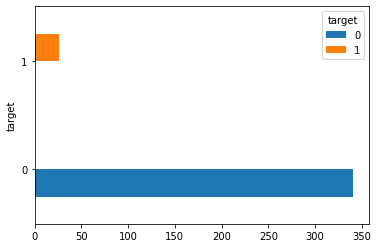

In [ ]:
pd.crosstab(df.target, df.target).plot.barh()
plt.show()

We can see here the dataset is highly imbalanced.

we can assume who has no dependency has high chance to get the loan, as dependency increases the peole get less chance to get loan

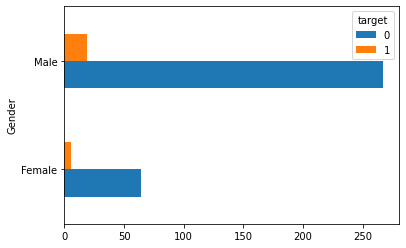

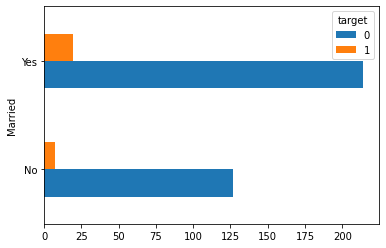

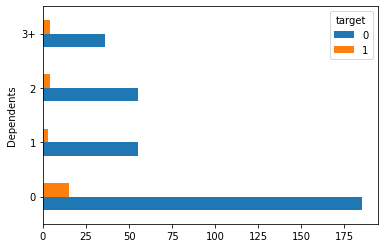

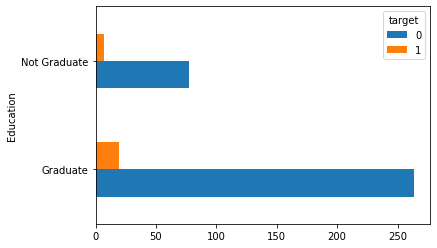

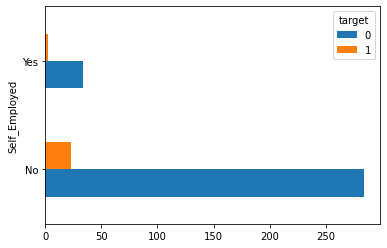

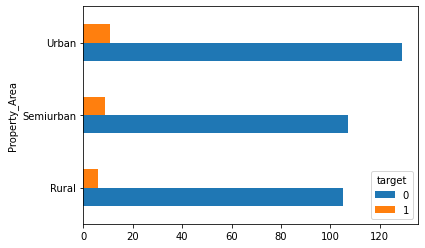

In [ ]:
for i in df:
  if i != 'Loan_ID' and df[i].dtype in ['bool', object]:
    print('\n')
    pd.crosstab(df[i], df.target).plot.barh()
    plt.show()

we take the feature with categorical value and can see every feature is highly imbalanced

In [ ]:
colors = np.array(['red', 'blue'])

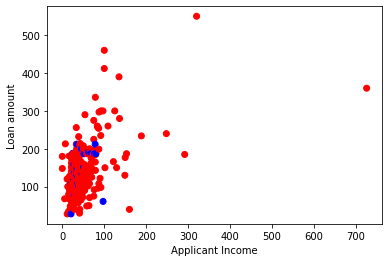

In [ ]:
df_sort = df.sort_values('ApplicantIncome')
df_sort.head()
plt.scatter(df_sort.ApplicantIncome/100, df_sort.LoanAmount, color = colors[df_sort.target])
plt.xlabel('Applicant Income')
plt.ylabel('Loan amount')
plt.show()

Sort applicant income and devide with 100, so that the value range make similar with loan amount.

here we can observe,

As applicant income increases, loan amount also increases accordingly.

##### distplot

In [ ]:
df.shape

(289, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


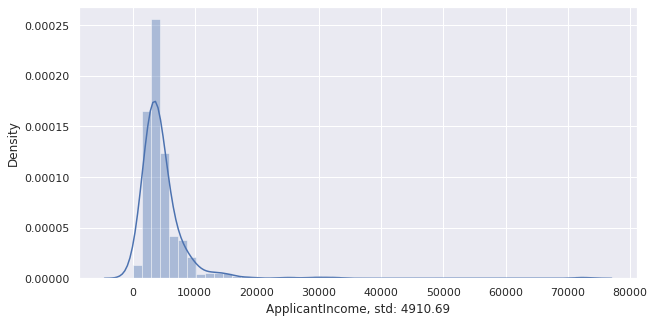

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


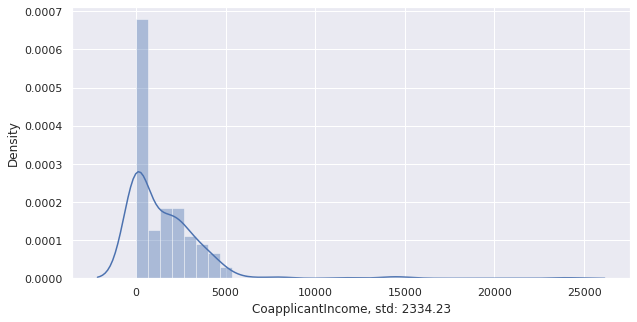

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


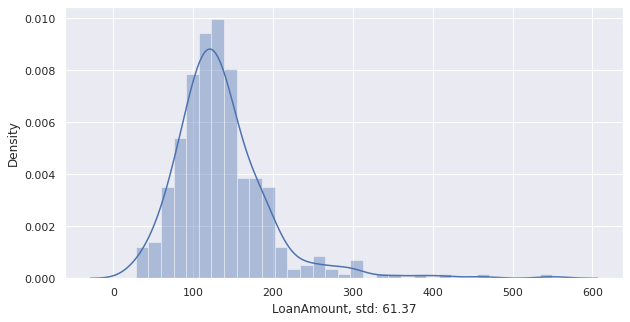

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


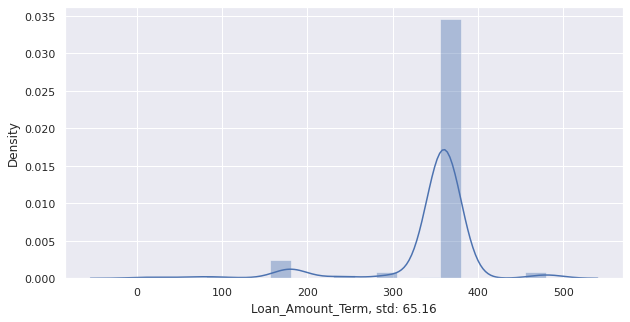

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


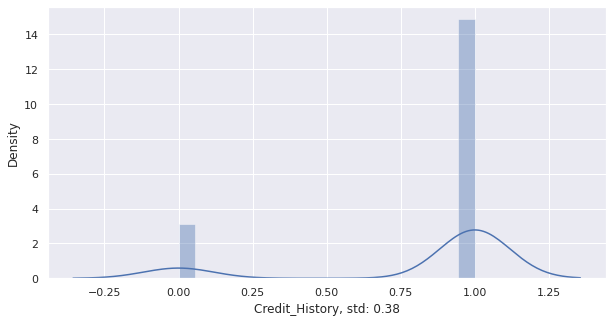

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


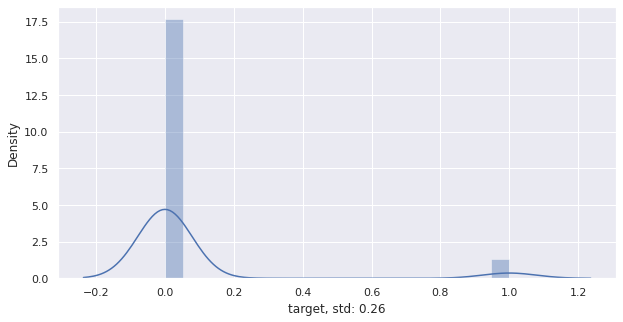

In [193]:
for i in df:
  if i != 'Loan_ID' and df[i].dtype not in ['bool', object]:
    print('\n')
    sns.distplot(df[i])
    plt.xlabel(f'{i}, std: {round(df[i].std(), 2)}')
    plt.show()

## Correlation using heatmap

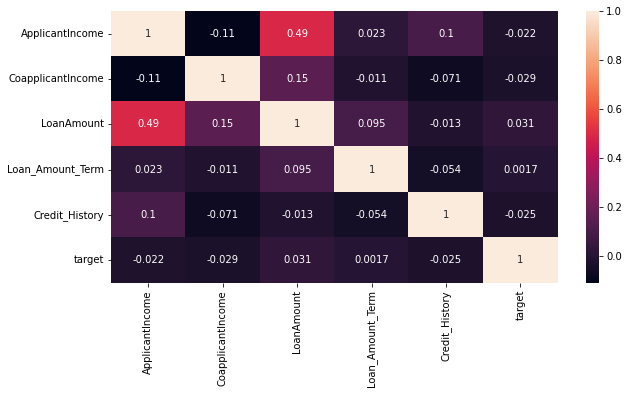

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True)
plt.show()

We can observe a high correlation compare to others,

Applicant income has positive correlation with Loan amount.

# Data preprocessing

## Drop Loan_ID

In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0


## Drop null values

In [ ]:
for i in range(0, len(df.columns)):
  if df.isnull().sum()[i] != 0:
    print(df.isnull().sum()[i:i+1])

Gender    11
dtype: int64
Dependents    10
dtype: int64
Self_Employed    23
dtype: int64
LoanAmount    5
dtype: int64
Loan_Amount_Term    6
dtype: int64
Credit_History    29
dtype: int64


**Check all rows with null values**

In [ ]:
df[df.isnull().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,0
11,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban,0
12,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban,0
13,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
336,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,NaN,Urban,0
351,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural,0
358,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural,0
360,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban,0


In [ ]:
df[df.isnull().any(axis=1)].shape

(78, 12)

78 rows found where have null value in some column

In [ ]:
df[df.isnull().any(axis=1)].target.value_counts()

0    75
1     3
Name: target, dtype: int64

most of the null value rows target value is 0

In [ ]:
df.drop(df[df.isnull().any(axis=1)].index.to_list(), axis = 0, inplace= True)

Drop all rows with null values

## Label Encoding

In [ ]:
lb = LabelEncoder()

skip Loan_ID as it is not necessary encode all categorical data

In [ ]:
for i in df:
  if i != 'Loan_ID' and df[i].dtype in ['bool', 'object']:
    print(f'{i}:\n')
    df[i] = lb.fit_transform(df[i])
    print(df[i].value_counts())
    print('\n')

Gender:

1    230
0     59
Name: Gender, dtype: int64


Married:

1    187
0    102
Name: Married, dtype: int64


Dependents:

0    167
2     50
1     42
3     30
Name: Dependents, dtype: int64


Education:

0    224
1     65
Name: Education, dtype: int64


Self_Employed:

0    257
1     32
Name: Self_Employed, dtype: int64


Property_Area:

2    113
0     89
1     87
Name: Property_Area, dtype: int64




In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,0
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,0
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,0
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,0
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,0


## Remove Outlier


ApplicantIncome:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


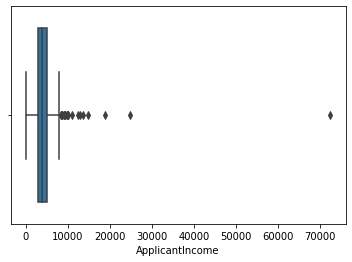


CoapplicantIncome:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


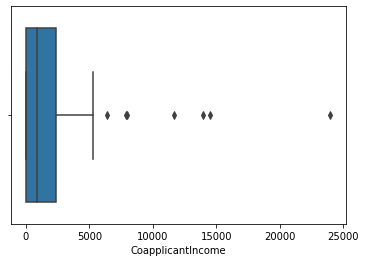


LoanAmount:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


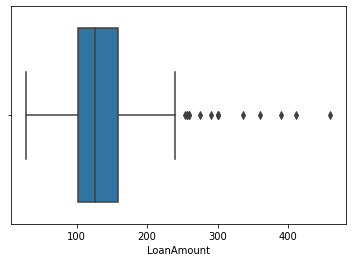

In [ ]:
for i in df.loc[:, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
  print(f'\n{i}:\n')
  sns.boxplot(df[i])
  plt.show()

In [ ]:
median = float(df['ApplicantIncome'].median())
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] >20000, median,df['ApplicantIncome'])

In [ ]:
median = float(df['CoapplicantIncome'].median())
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"] >10000, median,df['CoapplicantIncome'])

In [ ]:
median = float(df['LoanAmount'].median())
df["LoanAmount"] = np.where(df["LoanAmount"] >300, median,df['LoanAmount'])

Replaced outliers with median value

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,2,0
1,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,2,0
2,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,2,0
4,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,2,0
5,1,1,0,1,1,2165.0,3422.0,152.0,360.0,1.0,2,0


In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,0.795848,0.647059,0.802768,0.224913,0.110727,4327.110727,1318.435986,132.197232,342.671280,0.840830,1.083045,0.079585
std,0.403780,0.478714,1.063533,0.418250,0.314338,2333.019679,1543.016480,48.844345,65.655503,0.366469,0.833348,0.271119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,102.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3833.000000,879.000000,126.000000,360.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5000.000000,2367.000000,152.000000,360.000000,1.000000,2.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,18840.000000,8000.000000,300.000000,480.000000,1.000000,2.000000,1.000000


## Balance data
SMOTE

In [ ]:
X = df.iloc[:,:-1]
y = df.target

In [ ]:
oversample = SMOTE()
X_bal, y_bal = oversample.fit_resample(X, y)

used SMOTE technique to balance dataset

In [ ]:
X_bal.shape

(532, 11)

In [ ]:
X_bal.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,2


In [ ]:
X_bal.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.699248,0.618421,0.678571,0.150376,0.065789,4376.035945,1330.052039,139.066475,343.871608,0.826853,0.939850
std,0.459017,0.486231,0.940845,0.357776,0.248147,2141.378914,1478.945115,44.854895,63.902215,0.346894,0.761695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2985.857765,0.000000,110.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3705.263577,760.457419,135.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5083.561798,2529.814026,169.131285,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,18840.000000,8000.000000,300.000000,480.000000,1.000000,2.000000


## Feature Scaling

Min Max scale

scale down data 0 to 1

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_bal)

MinMaxScaler()

In [ ]:
features = pd.DataFrame(minmax_scaler.transform(X_bal), columns = X_bal.columns)

In [ ]:
features.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.303609,0.0000,0.301471,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.163270,0.1875,0.360294,0.746835,1.0,1.0


In [ ]:
features.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.699248,0.618421,0.226190,0.150376,0.065789,0.232274,0.166257,0.408333,0.712809,0.826853,0.469925
std,0.459017,0.486231,0.313615,0.357776,0.248147,0.113661,0.184868,0.164908,0.134815,0.346894,0.380847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.158485,0.000000,0.301471,0.746835,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.196670,0.095057,0.393382,0.746835,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.269828,0.316227,0.518865,0.746835,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train test split

In [ ]:
features.shape

(532, 11)

In [ ]:
y_bal.value_counts()

0    266
1    266
Name: target, dtype: int64

In [ ]:
# split train, validation and test 70, 15 and 15 respectively
X_train, X_test, y_train, y_test = train_test_split(features, y_bal, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1275, random_state=0)

# Model Train

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0, n_estimators=1000, min_samples_leaf=6)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_val)
y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

print('\n==================------------ Random Forest ------------==================')

print('train accuracy:', accuracy_score(y_train, y_predict_train_rf))
print('validation accuracy:', accuracy_score(y_val, y_predict_rf))
print('test accuracy:', accuracy_score(y_test, y_predict_test_rf))

print('\n--- validation ---\n')
print(pd.crosstab(y_val, y_predict_rf))
print()
print(classification_report(y_val, y_predict_rf))

print('\n--- test ---\n')
print(pd.crosstab(y_test, y_predict_test_rf))
print()
print(classification_report(y_test, y_predict_test_rf))


==================------------ Random Forest ------------==================
train accuracy: 0.9441624365482234
validation accuracy: 0.8793103448275862
test accuracy: 0.9

--- validation ---

col_0    0   1
target        
0       28   3
1        4  23

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.88      0.85      0.87        27

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58


--- test ---

col_0    0   1
target        
0       35   1
1        7  37

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        36
           1       0.97      0.84      0.90        44

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


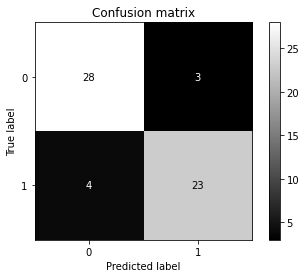

In [ ]:
plot_confusion_matrix(rf, X_val, y_val, cmap='gray')
plt.title('Confusion matrix')
plt.show()

on validation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


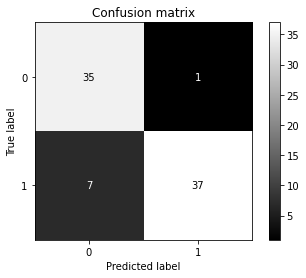

In [ ]:
plot_confusion_matrix(rf, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

on test

We can observe the result almost balanced for both class

## KNN

In [ ]:
print('\n==================------------ K-Nearest Neighbour ------------==================')

for i in range(2, 10, 2):
  # fit model with KNN
  m = KNeighborsClassifier(n_neighbors=i)
  m.fit(X_train, y_train)

  # predict on train, validation and test data
  y_pred_test = m.predict(X_test)
  y_pred_val = m.predict(X_val)
  y_pred_train = m.predict(X_train)

  # accuracy on train, validation and test
  test_acc = accuracy_score(y_test, y_pred_test)
  val_acc = accuracy_score(y_val, y_pred_val)
  train_acc = accuracy_score(y_train, y_pred_train)
  
  print(f'\n====================== K:{i} ======================')

  print('Training accuracy:', train_acc)
  print('Validation accuracy:', val_acc)
  print('Test accuracy:', test_acc)

  print('=====================')

  print('\n--- validation ---\n')
  print(pd.crosstab(y_val, y_pred_val))
  print()
  print(classification_report(y_val, y_pred_val))

  print('\n--- test ---\n')
  print(pd.crosstab(y_test, y_pred_test))
  print()
  print(classification_report(y_test, y_pred_test))
  print('\n------------------------------------------------------------------------------')


==================------------ K-Nearest Neighbour ------------==================

====================== K:2 ======================
Training accuracy: 0.9644670050761421
Validation accuracy: 0.8793103448275862
Test accuracy: 0.8875

--- validation ---

col_0    0   1
target        
0       27   4
1        3  24

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.86      0.89      0.87        27

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58


--- test ---

col_0    0   1
target        
0       31   5
1        4  40

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.89      0.91      0.90        44

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted 

Model trained using KNN with different k values and we can observe using k=2 does better classification compare to other k values

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_predict_knn = knn.predict(X_val)
y_predict_train_knn = knn.predict(X_train)
y_predict_test_knn = knn.predict(X_test)

print('\n==================------------ K Nearest Neighbor ------------==================')

print('train accuracy:', accuracy_score(y_train, y_predict_train_knn))
print('validation accuracy:', accuracy_score(y_val, y_predict_knn))
print('test accuracy:', accuracy_score(y_test, y_predict_test_knn))

print('\n--- validation ---\n')
print(pd.crosstab(y_val, y_predict_knn))
print()
print(classification_report(y_val, y_predict_knn))

print('\n--- test ---\n')
print(pd.crosstab(y_test, y_predict_test_knn))
print()
print(classification_report(y_test, y_predict_test_knn))


==================------------ K Nearest Neighbor ------------==================
train accuracy: 0.9644670050761421
validation accuracy: 0.8793103448275862
test accuracy: 0.8875

--- validation ---

col_0    0   1
target        
0       27   4
1        3  24

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.86      0.89      0.87        27

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58


--- test ---

col_0    0   1
target        
0       31   5
1        4  40

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.89      0.91      0.90        44

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


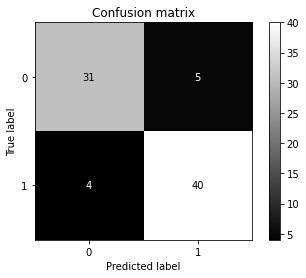

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

In [ ]:
train_sizes1, train_scores1, test_scores1 = learning_curve(m, X_train, y_train, cv=10, 
               scoring='accuracy', n_jobs=-1, 
               train_sizes=np.linspace(0.01, 1, 100), 
               verbose=1)

[learning_curve] Training set sizes: [  3   7  10  14  17  21  24  28  31  35  38  42  46  49  53  56  60  63
  67  70  74  77  81  84  88  92  95  99 102 106 109 113 116 120 123 127
 130 134 138 141 145 148 152 155 159 162 166 169 173 177 180 184 187 191
 194 198 201 205 208 212 215 219 223 226 230 233 237 240 244 247 251 254
 258 261 265 269 272 276 279 283 286 290 293 297 300 304 307 311 315 318
 322 325 329 332 336 339 343 346 350 354]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


In [ ]:
train_mean1 = np.mean(train_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)
test_mean1 = np.mean(test_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)

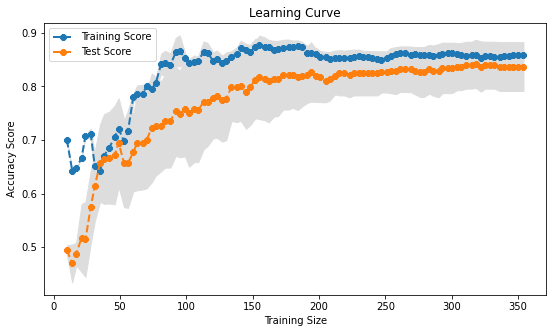

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(train_sizes1, train_mean1, marker='8', linestyle='dashed', linewidth=2, markersize=6, label='Training Score')
plt.plot(train_sizes1, test_mean1, marker='8', linestyle='dashed', linewidth=2, markersize=6, label='Test Score')

plt.fill_between(train_sizes1, train_mean1-train_std1, train_mean1+train_std1, color='#DDDDDD')
plt.fill_between(train_sizes1, test_mean1-test_std1, test_mean1+test_std1, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
plt.show()

## SVM

### Grid Search CV

In [ ]:
params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1.0, 10.0, 25.0, 50.0, 100.0],
    'gamma': [0.01, 0.1, 10.0]
}

In [ ]:
gscv = GridSearchCV(SVC(), param_grid=params, verbose=2)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 25.0, 50.0, 100.0],
                         'gamma': [0.01, 0.1, 10.0],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
gscv.best_params_

{'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'}

Got the hyperparameter which will work best compare to others

In [ ]:
gscv.best_score_

0.8706913339824732

### model train using these given parameter

In [ ]:
svm = SVC(kernel='rbf', C=10, gamma=10)
svm.fit(X_train, y_train)

y_predict_svm = svm.predict(X_val)
y_predict_train_svm = svm.predict(X_train)
y_predict_test_svm = svm.predict(X_test)

print('\n==================------------ Support Vector Classification ------------==================')

print('train accuracy:', accuracy_score(y_train, y_predict_train_svm))
print('validation accuracy:', accuracy_score(y_val, y_predict_svm))
print('test accuracy:', accuracy_score(y_test, y_predict_test_svm))

print('\n--- validation ---\n')
print(pd.crosstab(y_val, y_predict_svm))
print()
print(classification_report(y_val, y_predict_svm))

print('\n--- test ---\n')
print(pd.crosstab(y_test, y_predict_test_svm))
print()
print(classification_report(y_test, y_predict_test_svm))


==================------------ Support Vector Classification ------------==================
train accuracy: 0.9720812182741116
validation accuracy: 0.9310344827586207
test accuracy: 0.8875

--- validation ---

col_0    0   1
target        
0       29   2
1        2  25

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.93      0.93      0.93        27

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58


--- test ---

col_0    0   1
target        
0       29   7
1        2  42

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.86      0.95      0.90        44

    accuracy                           0.89        80
   macro avg       0.90      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


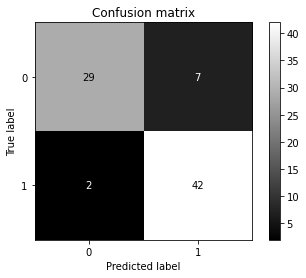

In [ ]:
plot_confusion_matrix(svm, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

we can observe,

the prediction looks pretty much balanced

## MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 64, 32, 20, 10), 
                    activation="relu", max_iter=3000, 
                    validation_fraction=0.2, random_state=1)

mlp.fit(X_train, y_train)

y_predict_mlp = mlp.predict(X_val)
y_predict_train_mlp = mlp.predict(X_train)
y_predict_test_mlp = mlp.predict(X_test)

print('\n==================------------ Support Vector Classification ------------==================')

print('train accuracy:', accuracy_score(y_train, y_predict_train_mlp))
print('validation accuracy:', accuracy_score(y_val, y_predict_mlp))
print('test accuracy:', accuracy_score(y_test, y_predict_test_mlp))

print('\n--- validation ---\n')
print(pd.crosstab(y_val, y_predict_mlp))
print()
print(classification_report(y_val, y_predict_mlp))

print('\n--- test ---\n')
print(pd.crosstab(y_test, y_predict_test_mlp))
print()
print(classification_report(y_test, y_predict_test_mlp))


==================------------ Support Vector Classification ------------==================
train accuracy: 0.9746192893401016
validation accuracy: 0.8275862068965517
test accuracy: 0.9

--- validation ---

col_0    0   1
target        
0       23   8
1        2  25

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.76      0.93      0.83        27

    accuracy                           0.83        58
   macro avg       0.84      0.83      0.83        58
weighted avg       0.84      0.83      0.83        58


--- test ---

col_0    0   1
target        
0       32   4
1        4  40

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.91      0.91      0.91        44

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


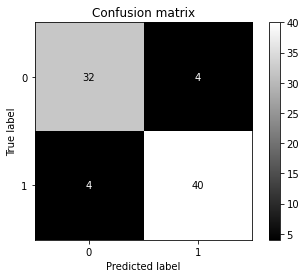

In [ ]:
plot_confusion_matrix(mlp, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

### Loss curve

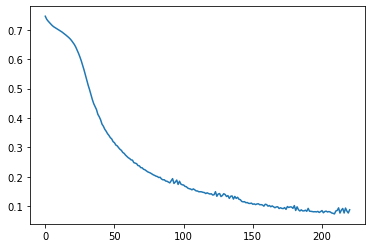

In [ ]:
plt.plot(mlp.loss_curve_)
plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=2500)
lr.fit(X_train, y_train)

y_predict_lr = lr.predict(X_val)
y_predict_train_lr = lr.predict(X_train)
y_predict_test_lr = lr.predict(X_test)

print('\n==================------------ Support Vector Classification ------------==================')

print('train accuracy:', accuracy_score(y_train, y_predict_train_lr))
print('validation accuracy:', accuracy_score(y_val, y_predict_lr))
print('test accuracy:', accuracy_score(y_test, y_predict_test_lr))

print('\n--- validation ---\n')
print(pd.crosstab(y_val, y_predict_lr))
print()
print(classification_report(y_val, y_predict_lr))

print('\n--- test ---\n')
print(pd.crosstab(y_test, y_predict_test_lr))
print()
print(classification_report(y_test, y_predict_test_lr))


==================------------ Support Vector Classification ------------==================
train accuracy: 0.6954314720812182
validation accuracy: 0.6724137931034483
test accuracy: 0.7125

--- validation ---

col_0    0   1
target        
0       20  11
1        8  19

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        31
           1       0.63      0.70      0.67        27

    accuracy                           0.67        58
   macro avg       0.67      0.67      0.67        58
weighted avg       0.68      0.67      0.67        58


--- test ---

col_0    0   1
target        
0       26  10
1       13  31

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        36
           1       0.76      0.70      0.73        44

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


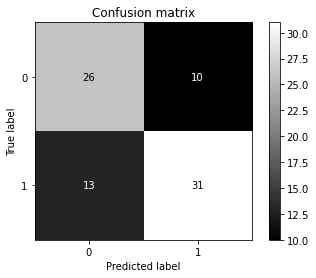

In [ ]:
plot_confusion_matrix(lr, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

## ROC curve

After observe all model, we can choose two model based on confusion matrix.

1. Random Forest

2. K Nearest Neighbor

AUC score for Random Forest

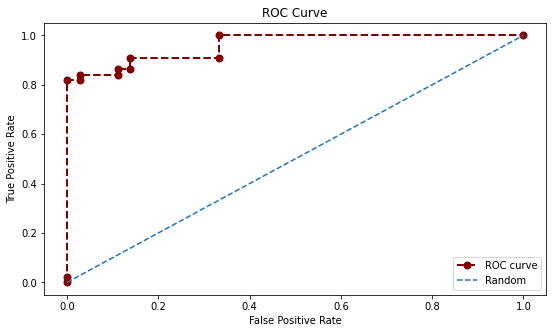

In [ ]:
proba1 = rf.predict_proba(X_test)[:, 1:]
proba2 = [0 for _ in range(len(y_test))]
fpr1, tpr1, threshold1 = roc_curve(y_test, proba1)
fpr2, tpr2, threshold2 = roc_curve(y_test, proba2)
plt.figure(figsize=(9, 5))
plt.plot(fpr1, tpr1, color='maroon', marker='o', linestyle='dashed', linewidth=2, markersize=7, label='ROC curve')
plt.plot(fpr2, tpr2, linestyle='--', label='Random', )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_test, proba1)

0.9602272727272728

AUC score for KNN

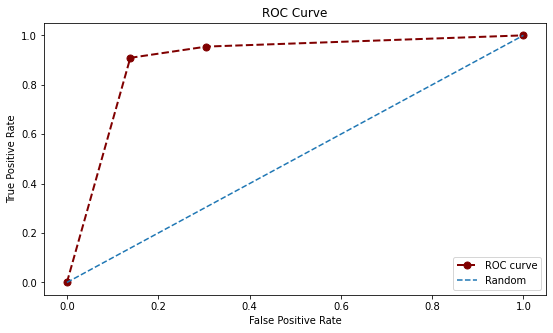

In [ ]:
proba1 = knn.predict_proba(X_test)[:, 1:]
proba2 = [0 for _ in range(len(y_test))]
fpr1, tpr1, threshold1 = roc_curve(y_test, proba1)
fpr2, tpr2, threshold2 = roc_curve(y_test, proba2)
plt.figure(figsize=(9, 5))
plt.plot(fpr1, tpr1, color='maroon', marker='o', linestyle='dashed', linewidth=2, markersize=7, label='ROC curve')
plt.plot(fpr2, tpr2, linestyle='--', label='Random', )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_test, proba1)

0.8970959595959596

We observe,

AUC score is greater for Random Forest. Where we can see the model is 96% confident on its prediction.
Hence, we can choose Random Forest as final model.